## Feature scaling using k-Nearest Neighbours

To demonstrate the importance of feature scaling using k-Nearest Neighbours the example below shows the accuracy with and without feature scaling using mean scaling

First libraries and import and some functions are defined

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
%matplotlib inline

def normalise(dataframe):
    df_normalised = dataframe
    for feature_name in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
        df_mean = dataframe[feature_name].mean()
        df_std = dataframe[feature_name].std()
        df_normalised[feature_name] = (df_normalised[feature_name] - df_std) / (df_mean)
    return df_normalised

def dist_between(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(a - b, axis=1)

def knn(datapoint, X_train, y_train, k):
    datapoint = np.array(datapoint)

    a = dist_between(X_train, datapoint)
    a = a.argsort()[:k]
    _, count = np.unique(y_train[a], return_counts=True)
    return stats.mode(y_train[a])[0], np.max(count)/k*100

The dataset is loaded with the training and test data split out.  The variable neighbours definies up to how many neighbours will be shown starting from 1

In [2]:
df = sns.load_dataset("penguins", cache=True)
df = df.fillna(0)

random_seed = 1
neighbours = 20

X_train, X_test, y_train, y_test = train_test_split(df.drop(["species","island","sex"],axis=1).values,
                                                        df["species"].values, test_size=0.25, random_state=random_seed)
df = normalise(df)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(df.drop(["species","island","sex"],axis=1).values,
                                                df["species"].values, test_size=0.25, random_state=random_seed)

predicted_species = np.array([[""]]*len(y_test), dtype="<U10")
accuracy_score = np.array([[0,0,0]]*neighbours, dtype="float32")

Make predictions for both unscaled and scaled values of the test sets

In [3]:
for j in range(1, neighbours+1):
    
    accuracy_score[j-1, 0] = j

    for i in range(0,len(y_test)):
        predicted_species[i], prediction_certainty = knn(X_test[i], X_train, y_train, j)
    accuracy_score[j-1, 1] = round(metrics.accuracy_score(y_test, predicted_species),2)
    

    for i in range(0,len(y_test)):
        predicted_species[i], prediction_certainty = knn(X_test_norm[i], X_train_norm, y_train, j)
    accuracy_score[j-1, 2] = round(metrics.accuracy_score(y_test, predicted_species),2)

Display graphs showing the accuracy for each trial

Text(0, 0.5, 'Accuracy')

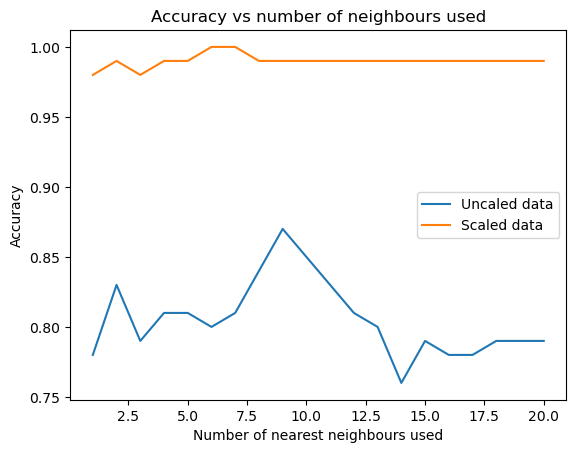

In [4]:
plt.plot(accuracy_score[:,0], accuracy_score[:,1], label="Uncaled data")
plt.plot(accuracy_score[:,0], accuracy_score[:,2], label="Scaled data")
plt.legend(loc="best")
plt.title("Accuracy vs number of neighbours used")
plt.xlabel("Number of nearest neighbours used")
plt.ylabel("Accuracy")

The below code is to get the same output but by using existing (and more optimised) libraries resulting in running time being 2 to 3 times faster

Text(0, 0.5, 'Accuracy')

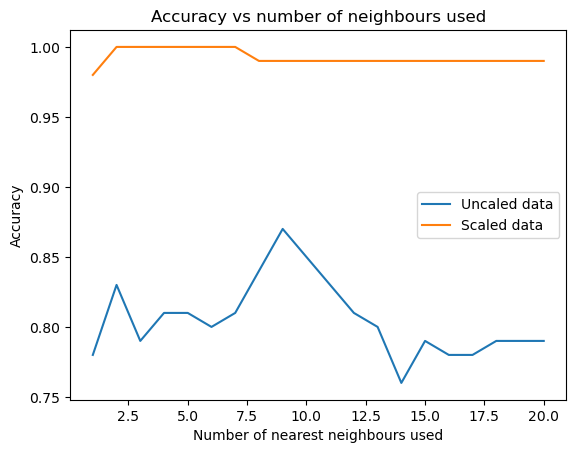

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

%matplotlib inline

#Additional libraries used
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

random_seed = 1
neighbours = 20

df = sns.load_dataset("penguins", cache=True)
df = df.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(df.drop(["species","island","sex"],axis=1).values,
                                                        df["species"].values, test_size=0.25, random_state=random_seed)

accuracy_score = np.array([[0,0,0]]*neighbours, dtype="float32")

for j in range(1, neighbours+1):
    
    accuracy_score[j-1, 0] = j
    
    knn = KNeighborsClassifier(n_neighbors = j).fit(X_train, y_train)
    predicted_species = knn.predict(X_test)
    accuracy_score[j-1, 1] = round(metrics.accuracy_score(y_test, predicted_species),2)
    
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors = j).fit(X_train_norm, y_train)
    predicted_species = knn.predict(X_test_norm)
    accuracy_score[j-1, 2] = round(metrics.accuracy_score(y_test, predicted_species),2)
    
plt.plot(accuracy_score[:,0], accuracy_score[:,1], label="Uncaled data")
plt.plot(accuracy_score[:,0], accuracy_score[:,2], label="Scaled data")
plt.legend(loc="best")
plt.title("Accuracy vs number of neighbours used")
plt.xlabel("Number of nearest neighbours used")
plt.ylabel("Accuracy")